In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

HRM1017 analogread analysis


In [3]:
data=np.loadtxt('hrm1017_3.dat', delimiter=',')
#plt.plot(data)

In [4]:
def funcM(x,t):
    ret=sum(x[0:N2])+sum(x[t:N2+t])
    return ret

1.50420379639


C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


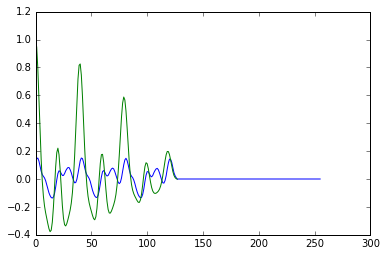

In [6]:
N=256
N2=N/2

x=data
x=(x-512)/512
x[N2:N] = np.zeros(N2)
plt.plot(x)

# smarter way paper
F=np.fft.fft(x)
#plt.plot(np.real(F))
ps=np.real(F*np.conjugate(F))
#plt.plot(ps)
r=np.real(np.fft.ifft(ps))
x2=x*x
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
#plt.plot(m)
print(m[0])
r=r[0:N2]
nsdf=2*r/m
plt.plot(nsdf)
#print(nsdf)

-- fft --
[ 0.00882721+0.j         -0.00130075-0.00416445j  0.00215763+0.00016697j
 -0.00274582-0.00095658j  0.00255318+0.00232301j -0.00521182+0.00023977j
  0.00474593+0.01419831j  0.01406422-0.00225287j  0.00278208-0.00429883j
  0.00336865-0.00061411j]
-- ps --
[ 0.00997371  0.00243643  0.00059946  0.00108218  0.00152513  0.00348423
  0.02868684  0.02596835  0.00335615  0.0015008 ]
-- ifft --
[ -3.25232744e-04 -9.10878056e-19j  -2.78204679e-04 -8.82396573e-19j
  -2.16186047e-04 +4.06575815e-20j  -1.23582780e-04 +5.84607147e-21j
   1.58548355e-05 +2.02744379e-19j   2.08258629e-04 +5.60323035e-19j
   4.42832708e-04 +5.53003115e-19j   6.87055290e-04 +9.60933945e-19j
   8.93644989e-04 +1.51919167e-18j   1.01493299e-03 +2.08817338e-18j]
-- ms --
[ 0.0029379   0.00291196  0.00287116  0.00282699  0.00279453  0.00277737
  0.0027711   0.00276919  0.00276845  0.00276833]
max r= 0.00146894901991 , max m= 0.00293789803982
-- nsdf --
[ 1.          0.9452841   0.79450178  0.58099475  0.34974245  0

C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\nobuh\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


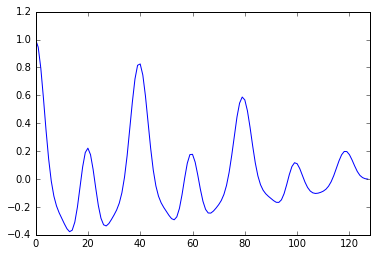

In [7]:

# overflow considering
F=np.fft.fft(x)/N             #scale to avoid overflow here
print("-- fft --")
print(F[0:10])
ps=np.real(F*np.conjugate(F))*N/2  #multiply N to get better resolution
print("-- ps --")
print(ps[0:10])
#plt.plot(ps[30:40])
ifftps=np.fft.ifft(ps)           #no scaling
print("-- ifft --")
print(ifftps[30:40])
r=np.real(ifftps)
#plt.plot(r)
x2=x*x/(N*2)                       #avoid overflow
m=np.zeros(N2)
for i in np.arange(N2):
    m[i]=funcM(x2,i)
print("-- ms --")
print(m[0:10])
#plt.plot(m)
r=r[0:N2]
print("max r=", np.max(r), ", max m=", np.max(m))
nsdf=2*r/(m)                #avoid overflow here
print("-- nsdf --")
print(nsdf[0:10])
plt.plot(nsdf)
plt.xlim([0,N2])
plt.show()

In [5]:
#512*1024adc and min, max w/o advertising
ts=np.array([38902980, 38901476, 38900266, 38900491, 38900613,38900814 ])
ts=ts*2/1000/1000

In [6]:
print(ts)
tavg=np.average(ts)
T=tavg

print("1024*1024 sampling took T=",T, "sec")
freq=1/(T)*1024*1024
print("freq per sample=", round(freq), "T per sample=", T/(1024*1024))
print("freq per 1024samples=", round(freq*1024))
ns=np.arange(128)
freqs=1/(ns*T/1024/1024)
#print(freqs)
k=np.log10(2**(1/12))
midinotes=np.round(np.log10(freqs/27.5)/k)+21
# array to use in program
print(midinotes)
print(midinotes[40])

[ 77.80596   77.802952  77.800532  77.800982  77.801226  77.801628]
1024*1024 sampling took T= 77.8022133333 sec
freq per sample= 13477.0 T per sample= 7.41979726156e-05
freq per 1024samples= 13800916.0
[  inf  128.  116.  109.  104.  100.   97.   95.   92.   90.   88.   87.
   85.   84.   83.   81.   80.   79.   78.   77.   76.   76.   75.   74.
   73.   73.   72.   71.   71.   70.   69.   69.   68.   68.   67.   67.
   66.   66.   65.   65.   64.   64.   64.   63.   63.   62.   62.   62.
   61.   61.   61.   60.   60.   60.   59.   59.   59.   58.   58.   58.
   57.   57.   57.   57.   56.   56.   56.   55.   55.   55.   55.   54.
   54.   54.   54.   53.   53.   53.   53.   53.   52.   52.   52.   52.
   52.   51.   51.   51.   51.   51.   50.   50.   50.   50.   50.   49.
   49.   49.   49.   49.   49.   48.   48.   48.   48.   48.   48.   47.
   47.   47.   47.   47.   47.   46.   46.   46.   46.   46.   46.   46.
   45.   45.   45.   45.   45.   45.   45.   44.]
64.0


In [22]:
a=-0.00130075-0.00416445j
x=a*np.conjugate(a)/2
print(np.real(x))
(0.00130075**2 + 0.00416445**2)/2

9.5172971825e-06


9.5172971825e-06